In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv')
df.head(5)

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5


/tmp/ipykernel_18/657589083.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Total Matches')


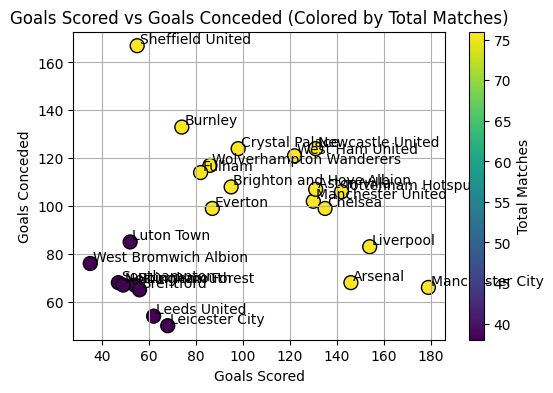

In [3]:

# Calculate total matches (wins + draws + losses)
df['total_matches'] = df['wins'] + df['draws'] + df['losses']

# Normalize total matches for coloring
norm = plt.Normalize(df['total_matches'].min(), df['total_matches'].max())
colors = plt.cm.viridis(norm(df['total_matches']))

# Scatter plot with color based on total matches
plt.figure(figsize=(6, 4))
plt.scatter(df['goals_scored'], df['goals_conceded'], color=colors, s=100, edgecolor='black')

# Add labels for each point
for i, team in enumerate(df['team']):
    plt.text(df['goals_scored'][i] + 1, df['goals_conceded'][i] + 1, team)

# Colorbar to indicate total matches
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Total Matches')

plt.title('Goals Scored vs Goals Conceded (Colored by Total Matches)')
plt.xlabel('Goals Scored')
plt.ylabel('Goals Conceded')
plt.grid(True)
plt.show()

In [4]:
df_sorted = df.sort_values(by='goals_scored', ascending=False)

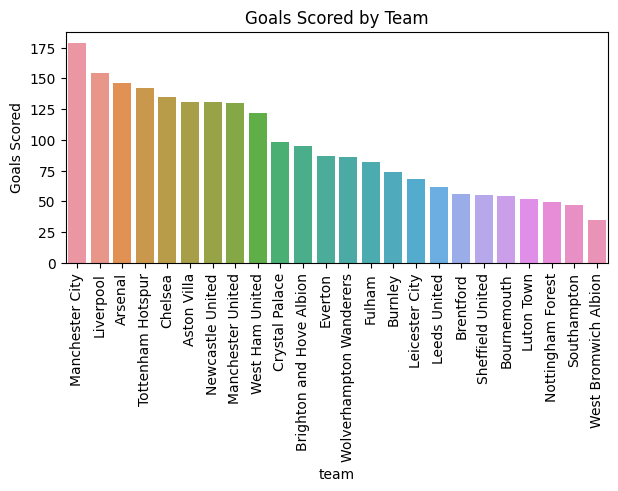

In [5]:
plt.figure(figsize=(7, 3))
sns.barplot(x='team', y='goals_scored', data=df_sorted)
plt.title('Goals Scored by Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.show()

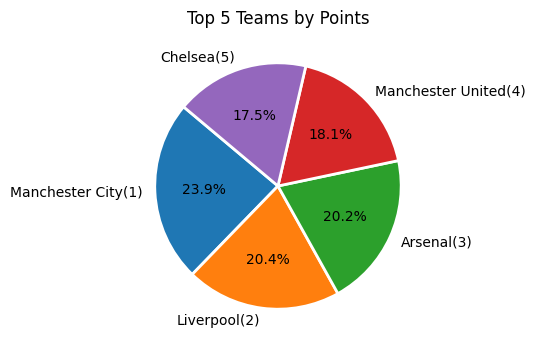

In [6]:
# Get the top 5 teams by points
top_5 = df.nlargest(5, 'points')

# Create labels with both team name and rank, using a '+' between them
labels = [f"{team}({rank})" for team, rank in zip(top_5['team'], top_5['rank'])]

# Plot the pie chart with labels
plt.figure(figsize=(4, 4))
plt.pie(
    top_5['points'], 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  # Adds white spaces
)
plt.title('Top 5 Teams by Points')
plt.show()

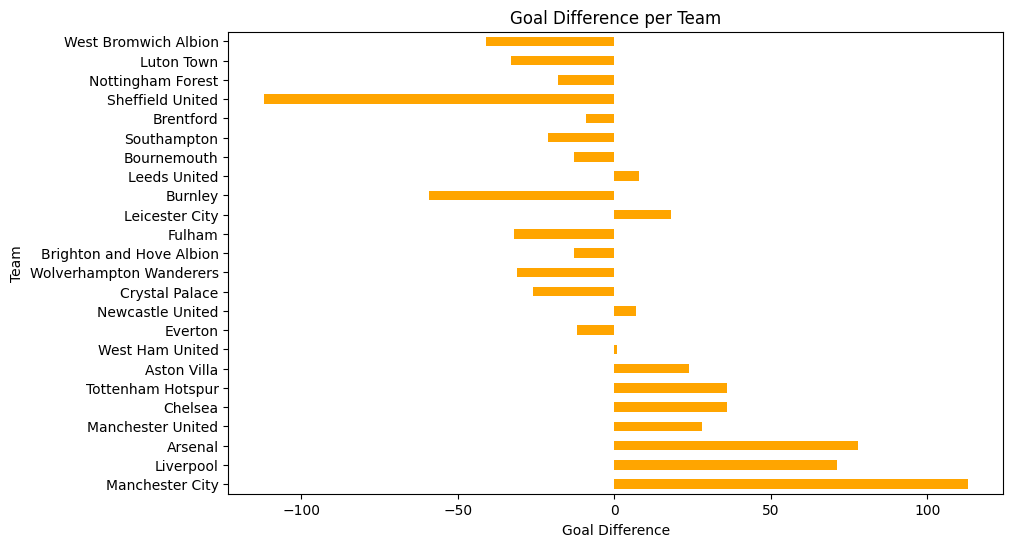

In [7]:

# Horizontal Bar Chart for Goal Difference
df.set_index('team')['goal_difference'].plot(kind='barh', color='orange', figsize=(10, 6))
plt.title('Goal Difference per Team')
plt.xlabel('Goal Difference')
plt.ylabel('Team')
plt.show()

In [8]:
# Calculate total matches played by summing wins, draws, and losses
df['total_matches'] = df['wins'] + df['draws'] + df['losses']

# Calculate win percentage, draw percentage, and loss percentage
df['win_percentage'] = (df['wins'] / df['total_matches']) * 100
df['draw_percentage'] = (df['draws'] / df['total_matches']) * 100
df['loss_percentage'] = (df['losses'] / df['total_matches']) * 100

# Display the DataFrame with calculated metrics
df[['team', 'total_matches', 'win_percentage', 'draw_percentage', 'loss_percentage']].head(5)

,team,total_matches,win_percentage,draw_percentage,loss_percentage
0,Manchester City,76,72.368421,15.789474,11.842105
1,Liverpool,76,57.894737,25.000000,17.105263
2,Arsenal,76,60.526316,15.789474,23.684211
3,Manchester United,76,51.315789,22.368421,26.315789
4,Chelsea,76,48.684211,25.000000,26.315789


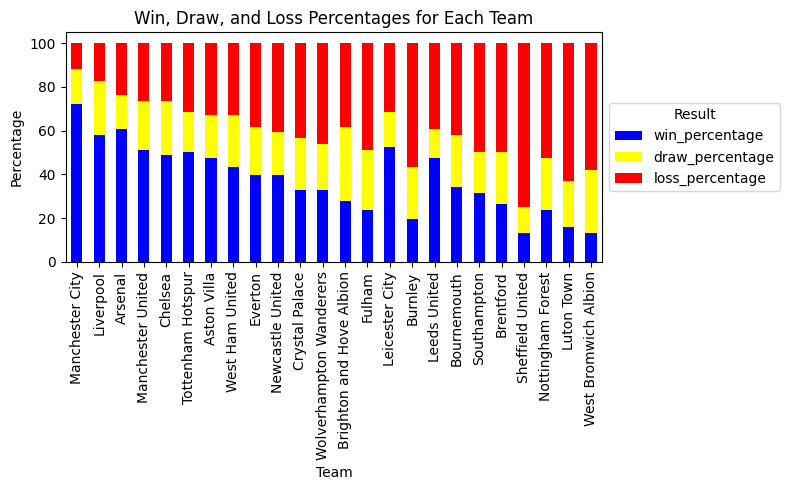

In [9]:
df.set_index('team')[['win_percentage', 'draw_percentage', 'loss_percentage']].plot(
    kind='bar', stacked=True, figsize=(8, 5), color=['Blue', 'yellow', 'red'])

plt.title('Win, Draw, and Loss Percentages for Each Team')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Result")  # Move the legend outside
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()